In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#coding:utf-8
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#有中文出现的情况，需要u'内容'

## bank client data|名词变量对照解释

|编号|变量名|解释|类型|取值|
|----|-------|--------|---|---|
|1| age|| numeric||
 |2|job|type of job| categorical| "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services"|
   |3|marital|marital status |categorical| "married","divorced","single"; note| "divorced" means divorced or widowed|
   |4|education ||categorical| "unknown","secondary","primary","tertiary"|
   |5|default| has credit in default?|binary| "yes","no"|
   |6|balance| average yearly balance, in euros |numeric |
   |7|housing| has housing loan?| binary| "yes","no"|
   |8|loan| has personal loan?| binary| "yes","no"|


related with the last contact of the current campaign
   
|编号|变量名|解释|类型|取值|
|----|-------|--------|---|---|
   |9|contact| contact communication type |categorical| "unknown","telephone","cellular" |
  |10|day| last contact day of the month |numeric|
  |11|month| last contact month of year |categorical| "jan", "feb", "mar", ..., "nov", "dec"|
  |12|duration| last contact duration, in seconds |numeric|

other attributes

|编号|变量名|解释|类型|取值|
|----|-------|--------|---|---|
  |13|campaign| number of contacts performed during this campaign and for this client numeric, includes last contact|numeric|
  |14|pdays| number of days that passed by after the client was last contacted from a previous campaign |numeric| -1 means client was not previously contacted|
  |15|previous| number of contacts performed before this campaign and for this client |numeric|
  |16|poutcome| outcome of the previous marketing campaign |categorical| "unknown","other","failure","success"|

  Output variable desired target
  
|编号|变量名|解释|类型|取值|
|----|-------|--------|---|---|
  |17|y|has the client subscribed a term deposit| binary| "yes","no"|

## 导入数据

In [3]:
# 导入数据
df = pd.read_csv("bank-full.csv", sep = ';') # 含测试集的全部数据
test = pd.read_csv("bank.csv",sep = ';') # 测试集

# 查看数据大小
print("bank-full.csv:", df.shape,"\n")
print("测试集", test.shape,"\n")

bank-full.csv: (45211, 17) 

测试集 (4521, 17) 



In [4]:
# 查看数据
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# 查看缺失值
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


##  去掉测试集

In [7]:
df = df.append(test)
df.drop_duplicates(keep = False, inplace = True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# 查看数据分布

In [8]:
# 查看数据类型
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

## binary格式的变量

In [9]:
# binary变量:
bin_variables = ["default", "housing", "loan", "y"]

### 画出分布

* 绝大多数人没有违约
* 有房贷的人比没有房贷的多一些
* 有loan的人很少
* 大多数营销没有成功

In [10]:
# 查看分布结果
for var in bin_variables:
    print(df[var].value_counts())

no     39951
yes      739
Name: default, dtype: int64
yes    22571
no     18119
Name: housing, dtype: int64
no     34137
yes     6553
Name: loan, dtype: int64
no     35922
yes     4768
Name: y, dtype: int64


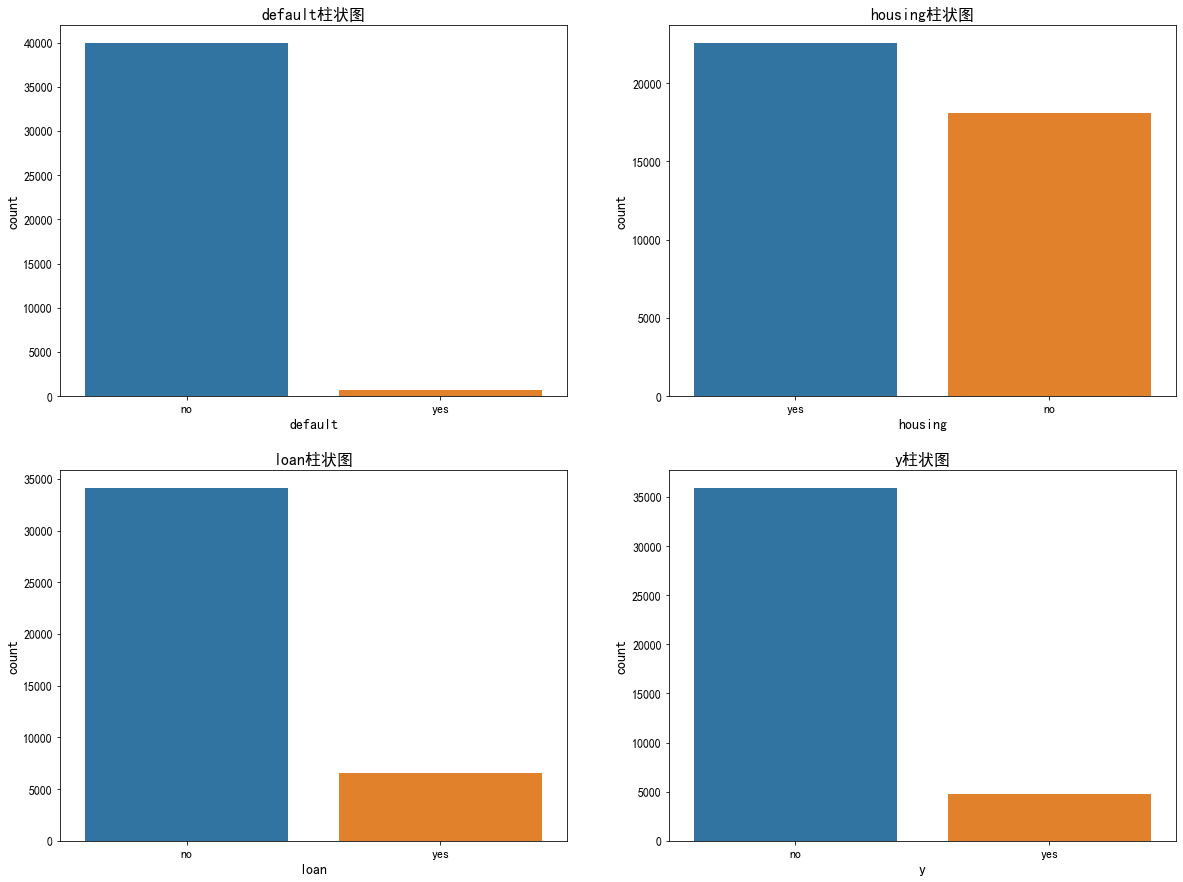

In [11]:
bin_plot_id = len(bin_variables)+1
bin_nrows = int(bin_plot_id/2)

plt.figure(figsize = (20,15))
for i in range(1, bin_plot_id):
    plt.subplot(bin_nrows,2,i)
    # 画的内容
    sns.countplot(x = bin_variables[i-1], data = df)
    
    # 调整一下字体大小
    plt.xticks(size = 12)
    plt.xlabel(xlabel = bin_variables[i-1], size = 14)
    plt.yticks(size = 12)
    plt.ylabel(ylabel = "count", size = 14)
    
    # 调整title
    plt.title("%s柱状图"%bin_variables[i-1], size = 16)

### 与y

In [12]:
# y 与default
df.groupby(by = ["y","default"], as_index = False)["age"].agg({"num":"count"})

,y,default,num
0,no,no,35226
1,no,yes,696
2,yes,no,4725
3,yes,yes,43


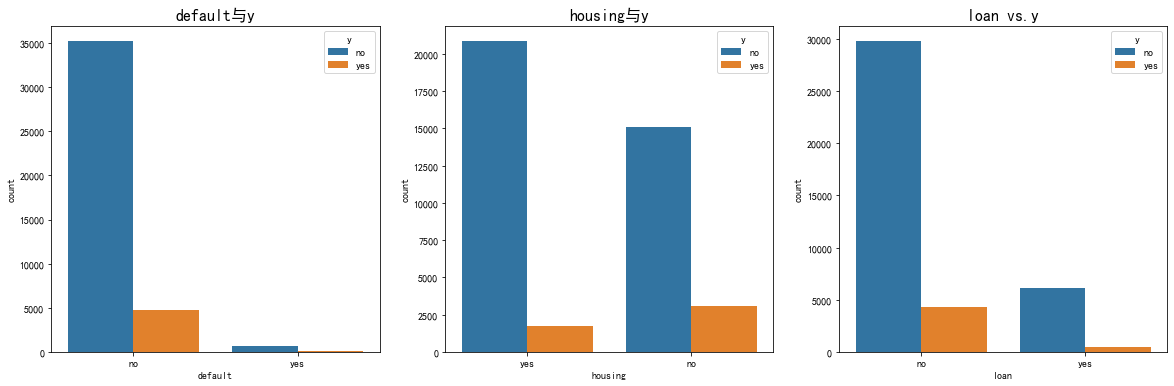

In [13]:
plt.figure(figsize = (20,6))

# default
plt.subplot(131)
sns.countplot(x = "default", hue = "y", data = df)
plt.title("default与y", size = 16)

# housing
plt.subplot(132)
sns.countplot(x = "housing", hue = "y", data = df)
plt.title("housing与y", size = 16)

# loan
plt.subplot(133)
sns.countplot(x = "loan", hue = "y", data = df)
plt.title("loan vs.y", size = 16)
plt.show()

In [14]:
# 分类统计2
# 一共有16类人
temp_1 = df.groupby(by = ["default","housing","loan","y"], as_index = False)["age"].agg({"num":"count"})
temp_1["pct%"] = temp_1["num"]/ temp_1["num"].sum()*100

# 按照人数的百分比从排序
temp_1.sort_values("pct%", ascending= False, inplace = True)
temp_1.reset_index(inplace = True)
temp_1

,index,default,housing,loan,y,num,pct%
0,4,no,yes,no,no,16886,41.499140
1,0,no,no,no,no,12491,30.697960
2,6,no,yes,yes,no,3606,8.862128
3,1,no,no,no,yes,2841,6.982059
4,2,no,no,yes,no,2243,5.512411
5,5,no,yes,no,yes,1456,3.578275
6,12,yes,yes,no,no,249,0.611944
7,7,no,yes,yes,yes,233,0.572622
8,3,no,no,yes,yes,195,0.479233
9,8,yes,no,no,no,184,0.452200


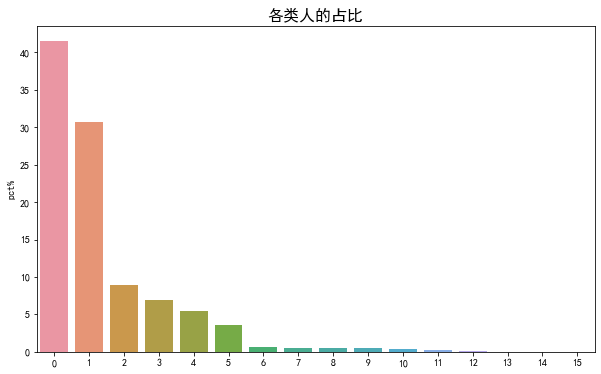

In [15]:
plt.figure(figsize = (10,6))
sns.barplot(x = temp_1.index, y = temp_1["pct%"])
plt.title("各类人的占比", size = 16)
plt.show()

In [16]:
# 修改类型
for var in bin_variables:
    print("正在修改：%s\n" % var)
    df[var] = df[var].apply(lambda x: 1 if x == 'yes' else 0)
    test[var]= test[var].apply(lambda x: 1 if x == 'yes' else 0)

正在修改：default

正在修改：housing

正在修改：loan

正在修改：y



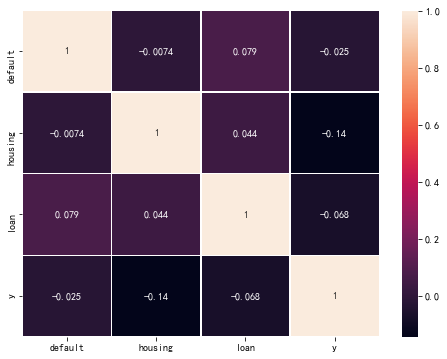

In [17]:
# 关联性
plt.figure(figsize = (8,6))
sns.heatmap(df[bin_variables].corr(), annot = True, linewidth = 0.5)
plt.show()

## 数字类型变量

In [18]:
# 数字型变量
numeric_variables = list(set(df.dtypes[df.dtypes == "int64"].index) - set(bin_variables))
print("\n分类变量有", len(numeric_variables),"个 \n",numeric_variables)

# 分类变量
categorical_variables = list(set(df.columns) - set(numeric_variables))
print("\n分类变量有", len(categorical_variables),"个 \n",categorical_variables)


分类变量有 7 个 
 ['previous', 'duration', 'age', 'campaign', 'pdays', 'balance', 'day']

分类变量有 10 个 
 ['marital', 'y', 'education', 'housing', 'month', 'poutcome', 'default', 'contact', 'loan', 'job']


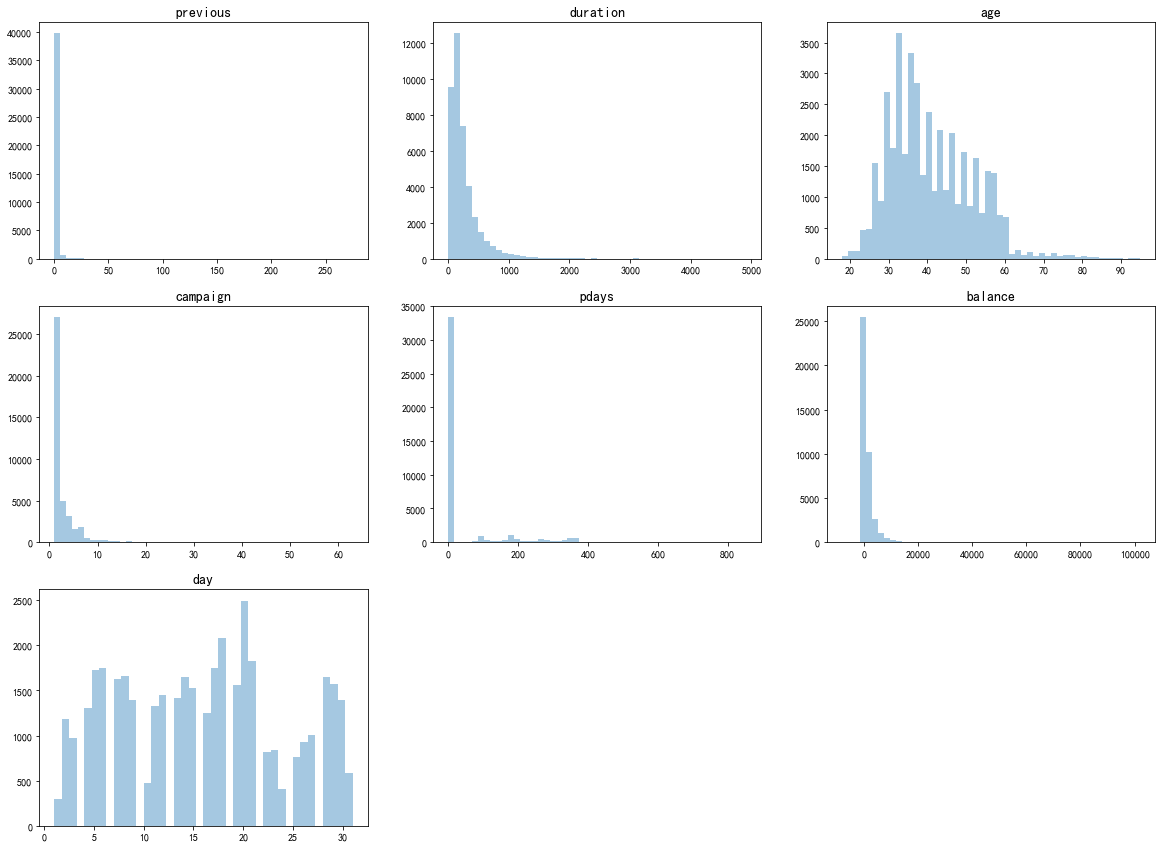

In [19]:
# 画各个数字类型变量的分布情况
num_plot_id = len(numeric_variables)+1 # 图的id
nrows = int(num_plot_id/2) # 需要多少行

plt.figure(figsize=(20, 20))

# 使用循环，画图
for i in range(1, num_plot_id):
    plt.subplot(nrows, 3, i)
    # axlabel设定为False，去掉图片下面的title，例如:"age"不显示在下方
    sns.distplot(a=df[numeric_variables[i-1]], kde=False, axlabel=False)
    plt.title(numeric_variables[i-1], size=14)

plt.show()

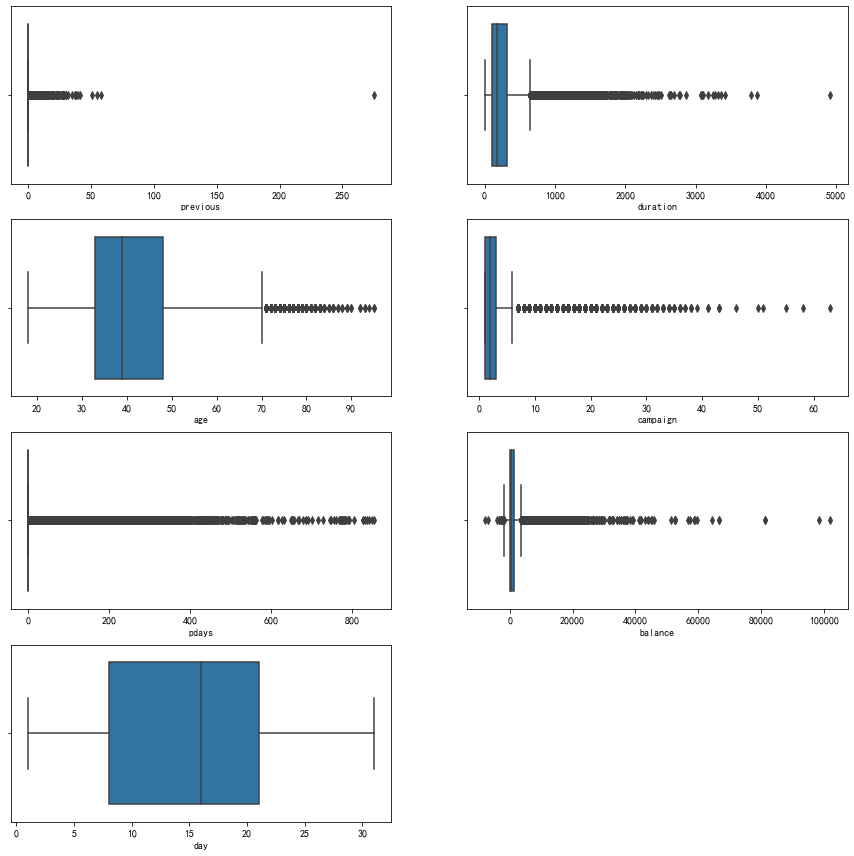

In [20]:
# 画箱型图
plt.figure(figsize=(15, 15))

# 使用循环，画图
for i in range(1, num_plot_id):
    plt.subplot(nrows, 2, i)
    # axlabel设定为False，去掉图片下面的title，例如:"age"不显示在下方
    sns.boxplot(df[numeric_variables[i-1]])
    #plt.title(numeric_variables[i-1], size=14)

plt.show()

In [21]:
# 查看统计
df[numeric_variables].describe()

,previous,duration,age,campaign,pdays,balance,day
count,40690.000000,40690.000000,40690.000000,40690.000000,40690.000000,40690.000000,40690.000000
mean,0.584517,257.518850,40.910224,2.760531,40.245736,1355.562694,15.794323
std,2.361480,257.262912,10.623291,3.096729,100.130708,3048.606598,8.330759
min,0.000000,0.000000,18.000000,1.000000,-1.000000,-8019.000000,1.000000
25%,0.000000,103.000000,33.000000,1.000000,-1.000000,73.000000,8.000000
50%,0.000000,180.000000,39.000000,2.000000,-1.000000,449.000000,16.000000
75%,0.000000,318.000000,48.000000,3.000000,-1.000000,1422.000000,21.000000
max,275.000000,4918.000000,95.000000,63.000000,854.000000,102127.000000,31.000000


In [22]:
# 查看众数
df[numeric_variables].mode()

,previous,duration,age,campaign,pdays,balance,day
0,0,124,32,1,-1,0,20


### 数据处理提纲

|变量|问题|处理方式|
|-------|---|---------------|
|age|有偏分布|归一化|
|balance|有偏分布|标准化|
|day|应该是日期|暂不确定|
|duration|数据格式问题|取对数|
|campaign|有偏分布||
|pdays|包含了另一个信息：之前有没有打过电话|拆分数据|
|previous|和其他变量有相关性||

创建一个新的变量：total_contact，把previous和 campaign相加，再去掉previous

### 相关系数

In [23]:
# 相关系数
df_corr = df[numeric_variables].corr()
df_corr

,previous,duration,age,campaign,pdays,balance,day
previous,1.000000,-0.000105,0.001718,-0.030178,0.446908,0.016027,-0.051300
duration,-0.000105,1.000000,-0.004965,-0.086424,-0.002893,0.025662,-0.030864
age,0.001718,-0.004965,1.000000,0.005835,-0.025391,0.099259,-0.008200
campaign,-0.030178,-0.086424,0.005835,1.000000,-0.088120,-0.015109,0.162676
pdays,0.446908,-0.002893,-0.025391,-0.088120,1.000000,0.002788,-0.092895
balance,0.016027,0.025662,0.099259,-0.015109,0.002788,1.000000,0.005902
day,-0.051300,-0.030864,-0.008200,0.162676,-0.092895,0.005902,1.000000


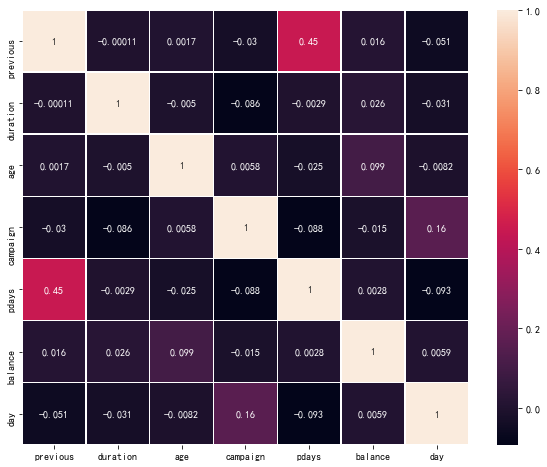

In [24]:
# 热力图
plt.figure(figsize = (10,8))
sns.heatmap(df_corr, annot = True, linewidths=.5)
plt.show()

In [25]:
# 如果这个客户之前没有接触过，那么previous也应该是0
temp = df[["pdays","previous"]].copy(deep = True)
temp["contact_before"] = temp["pdays"].apply(lambda x: 0 if x == -1 else 1)
temp.head()

,pdays,previous,contact_before
0,-1,0,0
1,-1,0,0
2,-1,0,0
3,-1,0,0
4,-1,0,0


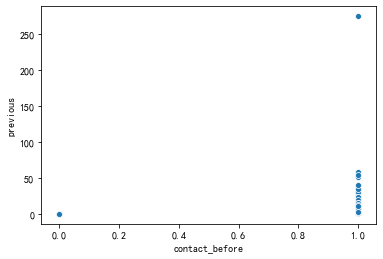

In [26]:
sns.scatterplot(x = "contact_before", y = "previous", data = temp)
plt.show()

### 散点图

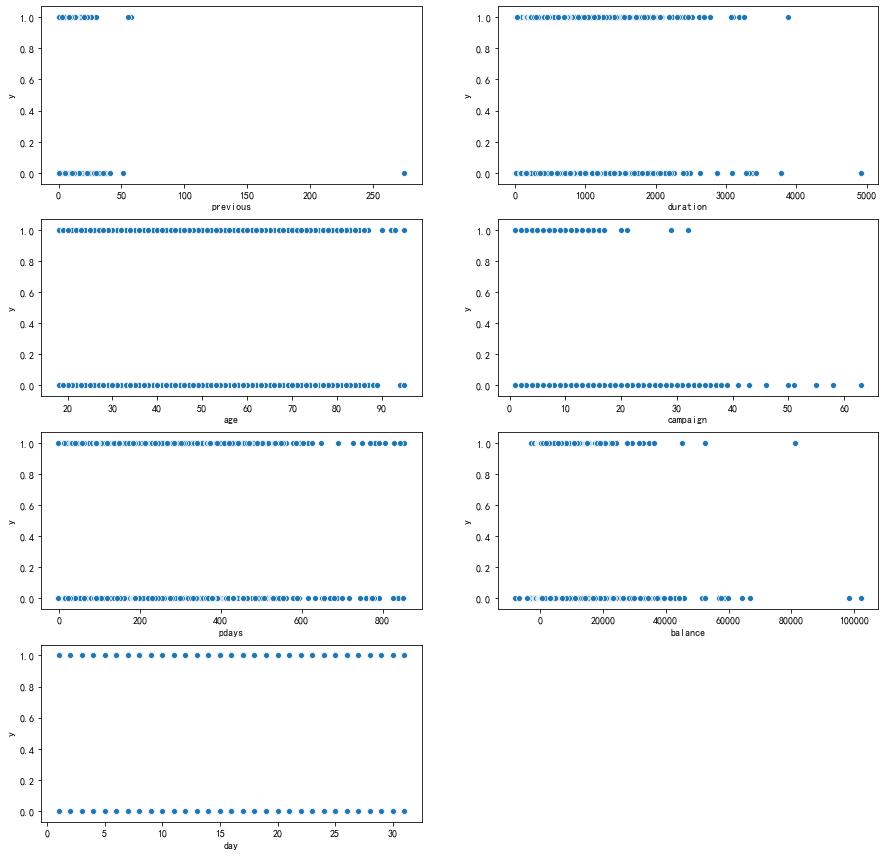

In [27]:
# 画箱型图
plt.figure(figsize=(15, 15))

# 使用循环，画图
for i in range(1, num_plot_id):
    plt.subplot(nrows, 2, i)
    # axlabel设定为False，去掉图片下面的title，例如:"age"不显示在下方
    sns.scatterplot(x = df[numeric_variables[i-1]], y = df['y'])
    #plt.title(numeric_variables[i-1], size=14)

plt.show()

## 分类类型变量

In [28]:
# 分类变量
categorical_variables

['marital',
 'y',
 'education',
 'housing',
 'month',
 'poutcome',
 'default',
 'contact',
 'loan',
 'job']

### 画柱状统计图

In [29]:
# 查看有每一种类型变量里，值的个数
for var in categorical_variables:
    print("%s的统计情况\n"%var, df[var].value_counts())
    print("-"*30)

marital的统计情况
 married     24417
single      11594
divorced     4679
Name: marital, dtype: int64
------------------------------
y的统计情况
 0    35922
1     4768
Name: y, dtype: int64
------------------------------
education的统计情况
 secondary    20896
tertiary     11951
primary       6173
unknown       1670
Name: education, dtype: int64
------------------------------
housing的统计情况
 1    22571
0    18119
Name: housing, dtype: int64
------------------------------
month的统计情况
 may    12368
jul     6189
aug     5614
jun     4810
nov     3581
apr     2639
feb     2427
jan     1255
oct      658
sep      527
mar      428
dec      194
Name: month, dtype: int64
------------------------------
poutcome的统计情况
 unknown    33254
failure     4411
other       1643
success     1382
Name: poutcome, dtype: int64
------------------------------
default的统计情况
 0    39951
1      739
Name: default, dtype: int64
------------------------------
contact的统计情况
 cellular     26389
unknown      11696
telephone     2605
Name: co

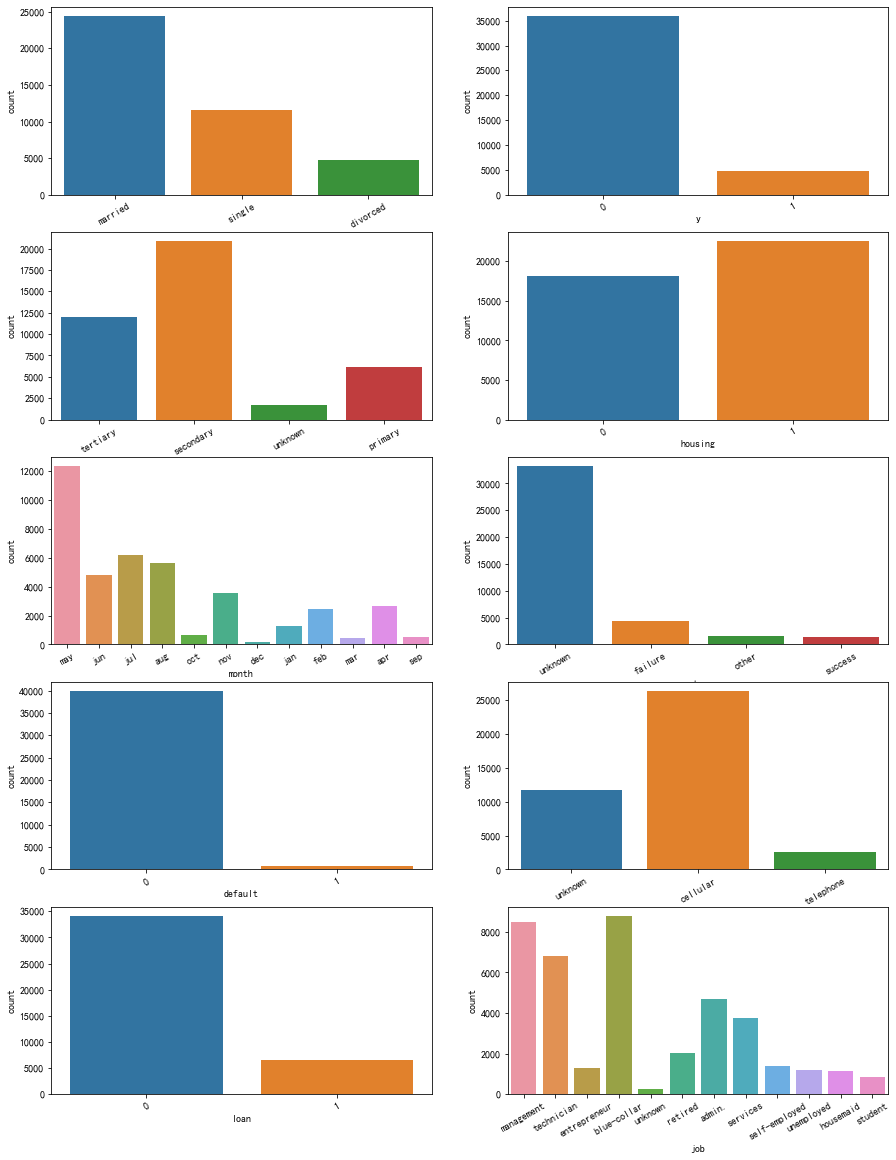

In [30]:
# 画柱状图
cat_plot_id = len(categorical_variables)+1
cat_nrows = int(cat_plot_id/2)

plt.figure(figsize=(15, 20))
for i in range(1, cat_plot_id):
    plt.subplot(cat_nrows, 2, i)
    # 用countplot()画出柱状图
    sns.countplot(x=categorical_variables[i-1], data=df)
    plt.xticks(rotation=30)

### 与y之间的关系

#### job和y

In [31]:
# job和y之间的关系，百分比
temp = df.groupby(["job","y"])["age"].count()
temp

job            y
admin.         0    4120
               1     573
blue-collar    0    8147
               1     639
entrepreneur   0    1211
               1     108
housemaid      0    1033
               1      95
management     0    7319
               1    1170
retired        0    1572
               1     462
self-employed  0    1229
               1     167
services       0    3406
               1     331
student        0     604
               1     250
technician     0    6072
               1     757
unemployed     0     986
               1     189
unknown        0     223
               1      27
Name: age, dtype: int64

In [32]:
temp_pct = pd.DataFrame(temp.groupby(level=0).apply(lambda x:100 * x / int(x.sum())))

# 重设索引，并修改列名
temp_pct.reset_index(inplace = True)
temp_pct.rename(columns = {"age":"pct%"}, inplace = True)

temp_pct.head()

,job,y,pct%
0,admin.,0,87.790326
1,admin.,1,12.209674
2,blue-collar,0,92.727066
3,blue-collar,1,7.272934
4,entrepreneur,0,91.811979


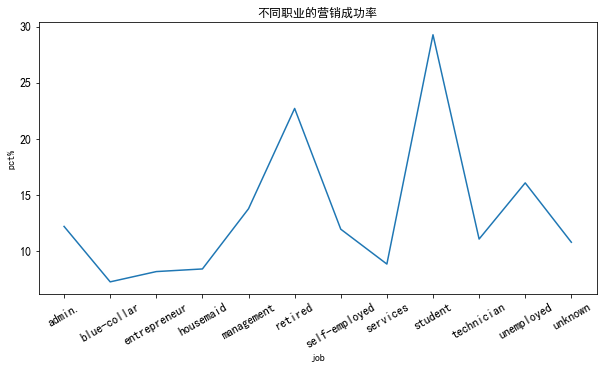

In [33]:
# 画个折线图
plt.figure(figsize = (10,5))
sns.lineplot(x = "job", y = "pct%", data = temp_pct[temp_pct.y == 1])
plt.xticks(rotation = 30, size = 12)
plt.yticks(size = 12)
plt.title("不同职业的营销成功率")
plt.show()

In [34]:
categorical_variables

['marital',
 'y',
 'education',
 'housing',
 'month',
 'poutcome',
 'default',
 'contact',
 'loan',
 'job']

#### month 和 y

In [35]:
# job和y之间的关系，百分比
temp = df.groupby(["month","y"])["age"].count()
temp_pct = pd.DataFrame(temp.groupby(level=0).apply(lambda x:100 * x / int(x.sum())))

# 重设索引，并修改列名
temp_pct.reset_index(inplace = True)
temp_pct.rename(columns = {"age":"pct%"}, inplace = True)
temp_pct.sort_values(by = "pct%", ascending = False, inplace = True)
temp_pct.head()

,month,y,pct%
16,may,0,93.272962
10,jul,0,90.854742
8,jan,0,89.960159
18,nov,0,89.835242
12,jun,0,89.792100


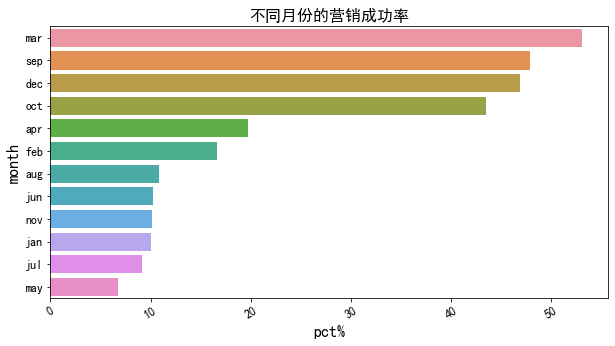

In [36]:
# 画个柱状图
plt.figure(figsize = (10,5))
sns.barplot(y = "month", x = "pct%", data = temp_pct[temp_pct.y == 1], orient = 'h')

# 设置x,y轴参数
plt.xticks(rotation = 30, size = 12)
plt.yticks(size = 12)
plt.xlabel(xlabel = "pct%",size = 16)
plt.ylabel(ylabel = "month",size = 16)

# 标题
plt.title("不同月份的营销成功率",size = 16)
plt.show()

#### marital

In [37]:
# marital和y之间的关系，百分比
temp = df.groupby(["marital","y"])["age"].count()
temp_pct = pd.DataFrame(temp.groupby(level=0).apply(lambda x:100 * x / int(x.sum())))

# 重设索引，并修改列名
temp_pct.reset_index(inplace = True)
temp_pct.rename(columns = {"age":"pct%"}, inplace = True)
temp_pct.sort_values(by = "pct%", ascending = False, inplace = True)
temp_pct.head()

,marital,y,pct%
2,married,0,89.851333
0,divorced,0,88.352212
4,single,0,84.949112
5,single,1,15.050888
1,divorced,1,11.647788


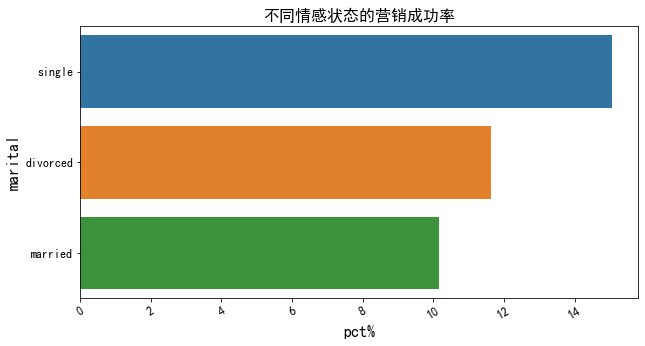

In [38]:
# 画个柱状图
plt.figure(figsize = (10,5))
sns.barplot(y = "marital", x = "pct%", data = temp_pct[temp_pct.y == 1], orient = 'h')

# 设置x,y轴参数
plt.xticks(rotation = 30, size = 12)
plt.yticks(size = 12)
plt.xlabel(xlabel = "pct%",size = 16)
plt.ylabel(ylabel = "marital",size = 16)

# 标题
plt.title("不同情感状态的营销成功率",size = 16)
plt.show()

#### poutcome

先空着，这个变量和pdays, previous等有一定关联性

#### education

In [39]:
# education和y之间的关系，百分比
temp = df.groupby(["education","y"])["age"].count()
temp_pct = pd.DataFrame(temp.groupby(level=0).apply(lambda x:100 * x / int(x.sum())))

# 重设索引，并修改列名
temp_pct.reset_index(inplace = True)
temp_pct.rename(columns = {"age":"pct%"}, inplace = True)
temp_pct.sort_values(by = "pct%", ascending = False, inplace = True)
temp_pct.head()

,education,y,pct%
0,primary,0,91.462822
2,secondary,0,89.447741
6,unknown,0,86.047904
4,tertiary,0,84.913396
5,tertiary,1,15.086604


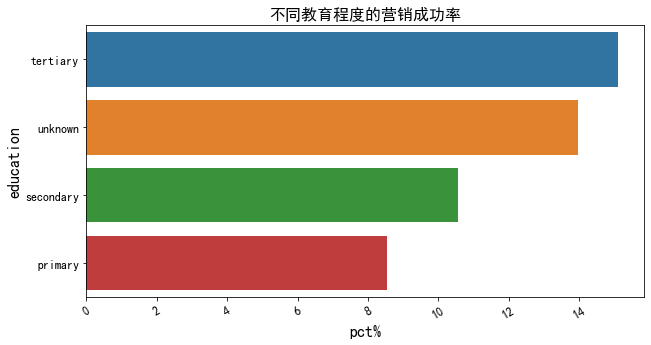

In [40]:
# 画个柱状图
plt.figure(figsize = (10,5))
sns.barplot(y = "education", x = "pct%", data = temp_pct[temp_pct.y == 1], orient = 'h')

# 设置x,y轴参数
plt.xticks(rotation = 30, size = 12)
plt.yticks(size = 12)
plt.xlabel(xlabel = "pct%",size = 16)
plt.ylabel(ylabel = "education",size = 16)

# 标题
plt.title("不同教育程度的营销成功率",size = 16)
plt.show()

#### contact

In [41]:
# contact和y之间的关系，百分比
temp = df.groupby(["contact","y"])["age"].count()
temp_pct = pd.DataFrame(temp.groupby(level=0).apply(lambda x:100 * x / int(x.sum())))

# 重设索引，并修改列名
temp_pct.reset_index(inplace = True)
temp_pct.rename(columns = {"age":"pct%"}, inplace = True)
temp_pct.sort_values(by = "pct%", ascending = False, inplace = True)
temp_pct.head()

,contact,y,pct%
4,unknown,0,95.990082
2,telephone,0,86.717850
0,cellular,0,85.020274
1,cellular,1,14.979726
3,telephone,1,13.282150


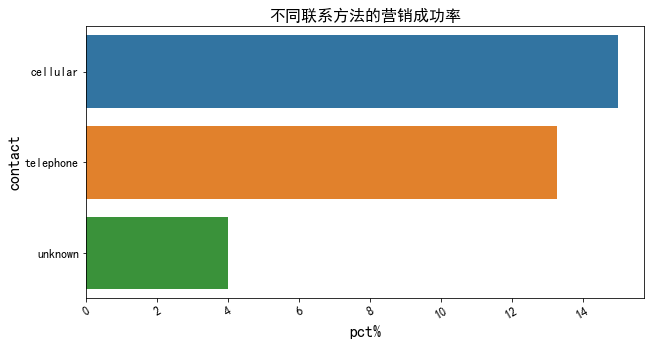

In [42]:
# 画个柱状图
plt.figure(figsize = (10,5))
sns.barplot(y = "contact", x = "pct%", data = temp_pct[temp_pct.y == 1], orient = 'h')

# 设置x,y轴参数
plt.xticks(rotation = 30, size = 12)
plt.yticks(size = 12)
plt.xlabel(xlabel = "pct%",size = 16)
plt.ylabel(ylabel = "contact",size = 16)

# 标题
plt.title("不同联系方法的营销成功率",size = 16)
plt.show()

# 数据清洗

## 顾客是否之前联系过

从上面的数据可以知道，如果有一个顾客从来没有联系过，那么pdays会被标记为-1,可能会影响到previous, poutcome, 和contact

|是否联系过|pdays|previous|poutcome|contact
|----------|-----|--------|--------||
|否|-1|0|||
|是||||

In [43]:
# 有多少顾客之前没有联系过？
df["是否联系过"] = df["pdays"].apply(lambda x: 0 if x == -1 else 1)
print(df["是否联系过"].value_counts())

# 在测试集里也构造该列
test["是否联系过"] = test["pdays"].apply(lambda x: 0 if x == -1 else 1)

0    33249
1     7441
Name: 是否联系过, dtype: int64


In [44]:
# 被影响的变量
effect_variables = ["previous","poutcome","contact"]

# 分类统计
temp2 = df.groupby(by = ["是否联系过","poutcome","contact"], as_index = False)["age"].agg({"num":"count"})
# 占比统计
temp2["prop"] = temp2["num"]/temp2["num"].sum()

temp2.sort_values(by = "prop", ascending = False, inplace = True)
temp2

,是否联系过,poutcome,contact,num,prop
0,0,unknown,cellular,19565,0.480831
2,0,unknown,unknown,11637,0.285992
3,1,failure,cellular,4082,0.100319
1,0,unknown,telephone,2047,0.050307
6,1,other,cellular,1466,0.036029
9,1,success,cellular,1271,0.031236
4,1,failure,telephone,302,0.007422
7,1,other,telephone,155,0.003809
10,1,success,telephone,101,0.002482
5,1,failure,unknown,27,0.000664


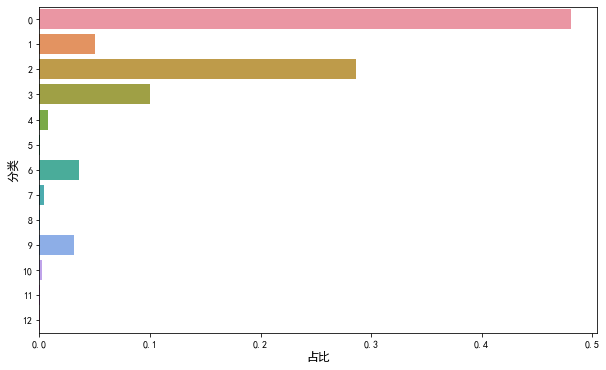

In [45]:
# 画图
plt.figure(figsize = (10,6))
sns.barplot(y = temp2.index, x = temp2["prop"], orient = "h")
plt.ylabel(ylabel = "分类",size = 12)
plt.xlabel(xlabel = "占比",size = 12)
plt.show()

如果之前：

* 没有联系过，
    - poutcome是unknown
* 之前联系过，
    - poutcome应该知道，不知道的比例比较小
    - contact的方式应该知道，不知道的比例也比较小

### 修改之前联系过，却为unknown poutcome的情况

使用众数填充

In [46]:
# 找训练集里的数据
edit_index = df[(df["是否联系过"] == 1) &(df["poutcome"] == "unknown")].index
df.loc[edit_index]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,是否联系过
40658,61,retired,married,tertiary,0,3140,1,1,cellular,6,aug,975,4,98,1,unknown,1,1
41821,39,management,married,tertiary,0,184,0,0,cellular,15,oct,206,1,168,5,unknown,0,1
42042,26,admin.,single,secondary,0,338,0,0,cellular,29,oct,209,1,188,2,unknown,1,1
43978,30,technician,single,secondary,0,254,1,1,cellular,24,jun,167,3,416,2,unknown,0,1
45021,37,management,married,secondary,0,209,0,0,cellular,14,oct,183,3,528,7,unknown,0,1


In [47]:
# 寻找众数
fill_val = df[df["是否联系过"] == 1]["poutcome"].mode()[0]
fill_val

'failure'

In [48]:
# 填充
df.loc[edit_index, "poutcome"] = fill_val
df.loc[edit_index,"poutcome"]

40658    failure
41821    failure
42042    failure
43978    failure
45021    failure
Name: poutcome, dtype: object

In [49]:
# 用相同方法修改测试集

# 找训练集里的数据
edit_index = test[(test["是否联系过"] == 1) &(test["poutcome"] == "unknown")].index

# 寻找众数
fill_val = test[test["是否联系过"] == 1]["poutcome"].mode()[0]

# 填充
test.loc[edit_index, "poutcome"] = fill_val
test.loc[edit_index,"poutcome"]

Series([], Name: poutcome, dtype: object)

### 修改之前联系过，却unknown contact的情况

使用众数填充

In [50]:
# 找训练集里的数据
edit_index = df[(df["是否联系过"] == 1) &(df["contact"] == "unknown")].index
df.loc[edit_index,"contact"]

24080    unknown
24136    unknown
24160    unknown
24364    unknown
24405    unknown
24415    unknown
24611    unknown
24624    unknown
24721    unknown
25060    unknown
41604    unknown
42228    unknown
43115    unknown
43121    unknown
43171    unknown
43226    unknown
43727    unknown
43802    unknown
43837    unknown
43839    unknown
43854    unknown
43884    unknown
43887    unknown
43905    unknown
43983    unknown
44036    unknown
44052    unknown
44053    unknown
44061    unknown
44062    unknown
44122    unknown
44243    unknown
44251    unknown
44259    unknown
44260    unknown
44478    unknown
44489    unknown
44546    unknown
44591    unknown
44599    unknown
44604    unknown
44647    unknown
44683    unknown
44687    unknown
44699    unknown
44758    unknown
44782    unknown
44785    unknown
44822    unknown
44832    unknown
44837    unknown
44840    unknown
44848    unknown
44906    unknown
44948    unknown
44965    unknown
44983    unknown
44989    unknown
45136    unkno

In [51]:
# 寻找众数
fill_val = df[df["是否联系过"] == 1]["contact"].mode()[0]
fill_val

'cellular'

In [52]:
# 填充
df.loc[edit_index, "contact"] = fill_val
df.loc[edit_index, "contact"]

24080    cellular
24136    cellular
24160    cellular
24364    cellular
24405    cellular
24415    cellular
24611    cellular
24624    cellular
24721    cellular
25060    cellular
41604    cellular
42228    cellular
43115    cellular
43121    cellular
43171    cellular
43226    cellular
43727    cellular
43802    cellular
43837    cellular
43839    cellular
43854    cellular
43884    cellular
43887    cellular
43905    cellular
43983    cellular
44036    cellular
44052    cellular
44053    cellular
44061    cellular
44062    cellular
44122    cellular
44243    cellular
44251    cellular
44259    cellular
44260    cellular
44478    cellular
44489    cellular
44546    cellular
44591    cellular
44599    cellular
44604    cellular
44647    cellular
44683    cellular
44687    cellular
44699    cellular
44758    cellular
44782    cellular
44785    cellular
44822    cellular
44832    cellular
44837    cellular
44840    cellular
44848    cellular
44906    cellular
44948    cellular
44965    c

In [53]:
# 用相同方法修改测试集

# 找训练集里的数据
edit_index = test[(test["是否联系过"] == 1) & (test["contact"] == "unknown")].index

# 寻找众数
fill_val = test[test["是否联系过"] == 1]["contact"].mode()[0]

# 填充
test.loc[edit_index, "contact"] = fill_val
test.loc[edit_index, "contact"]

40      cellular
1106    cellular
1167    cellular
1223    cellular
1343    cellular
1707    cellular
2103    cellular
2529    cellular
3134    cellular
3652    cellular
4073    cellular
Name: contact, dtype: object

## 职业相关

暂时不清楚这个怎么弄

比如blue-collar，housemaid我觉得也算blue-collar

比如Management 和admin似乎是一样的

比如entrepreneur似乎和self-employed一样

比如housemaid也可以算services

In [54]:
df.groupby(by = ['job','education'], as_index = False)["age"].agg({"num":"count"})

,job,education,num
0,admin.,primary,192
1,admin.,secondary,3826
2,admin.,tertiary,521
3,admin.,unknown,154
4,blue-collar,primary,3389
5,blue-collar,secondary,4847
6,blue-collar,tertiary,137
7,blue-collar,unknown,413
8,entrepreneur,primary,157
9,entrepreneur,secondary,484


### 和其他数字型变量之间的关系

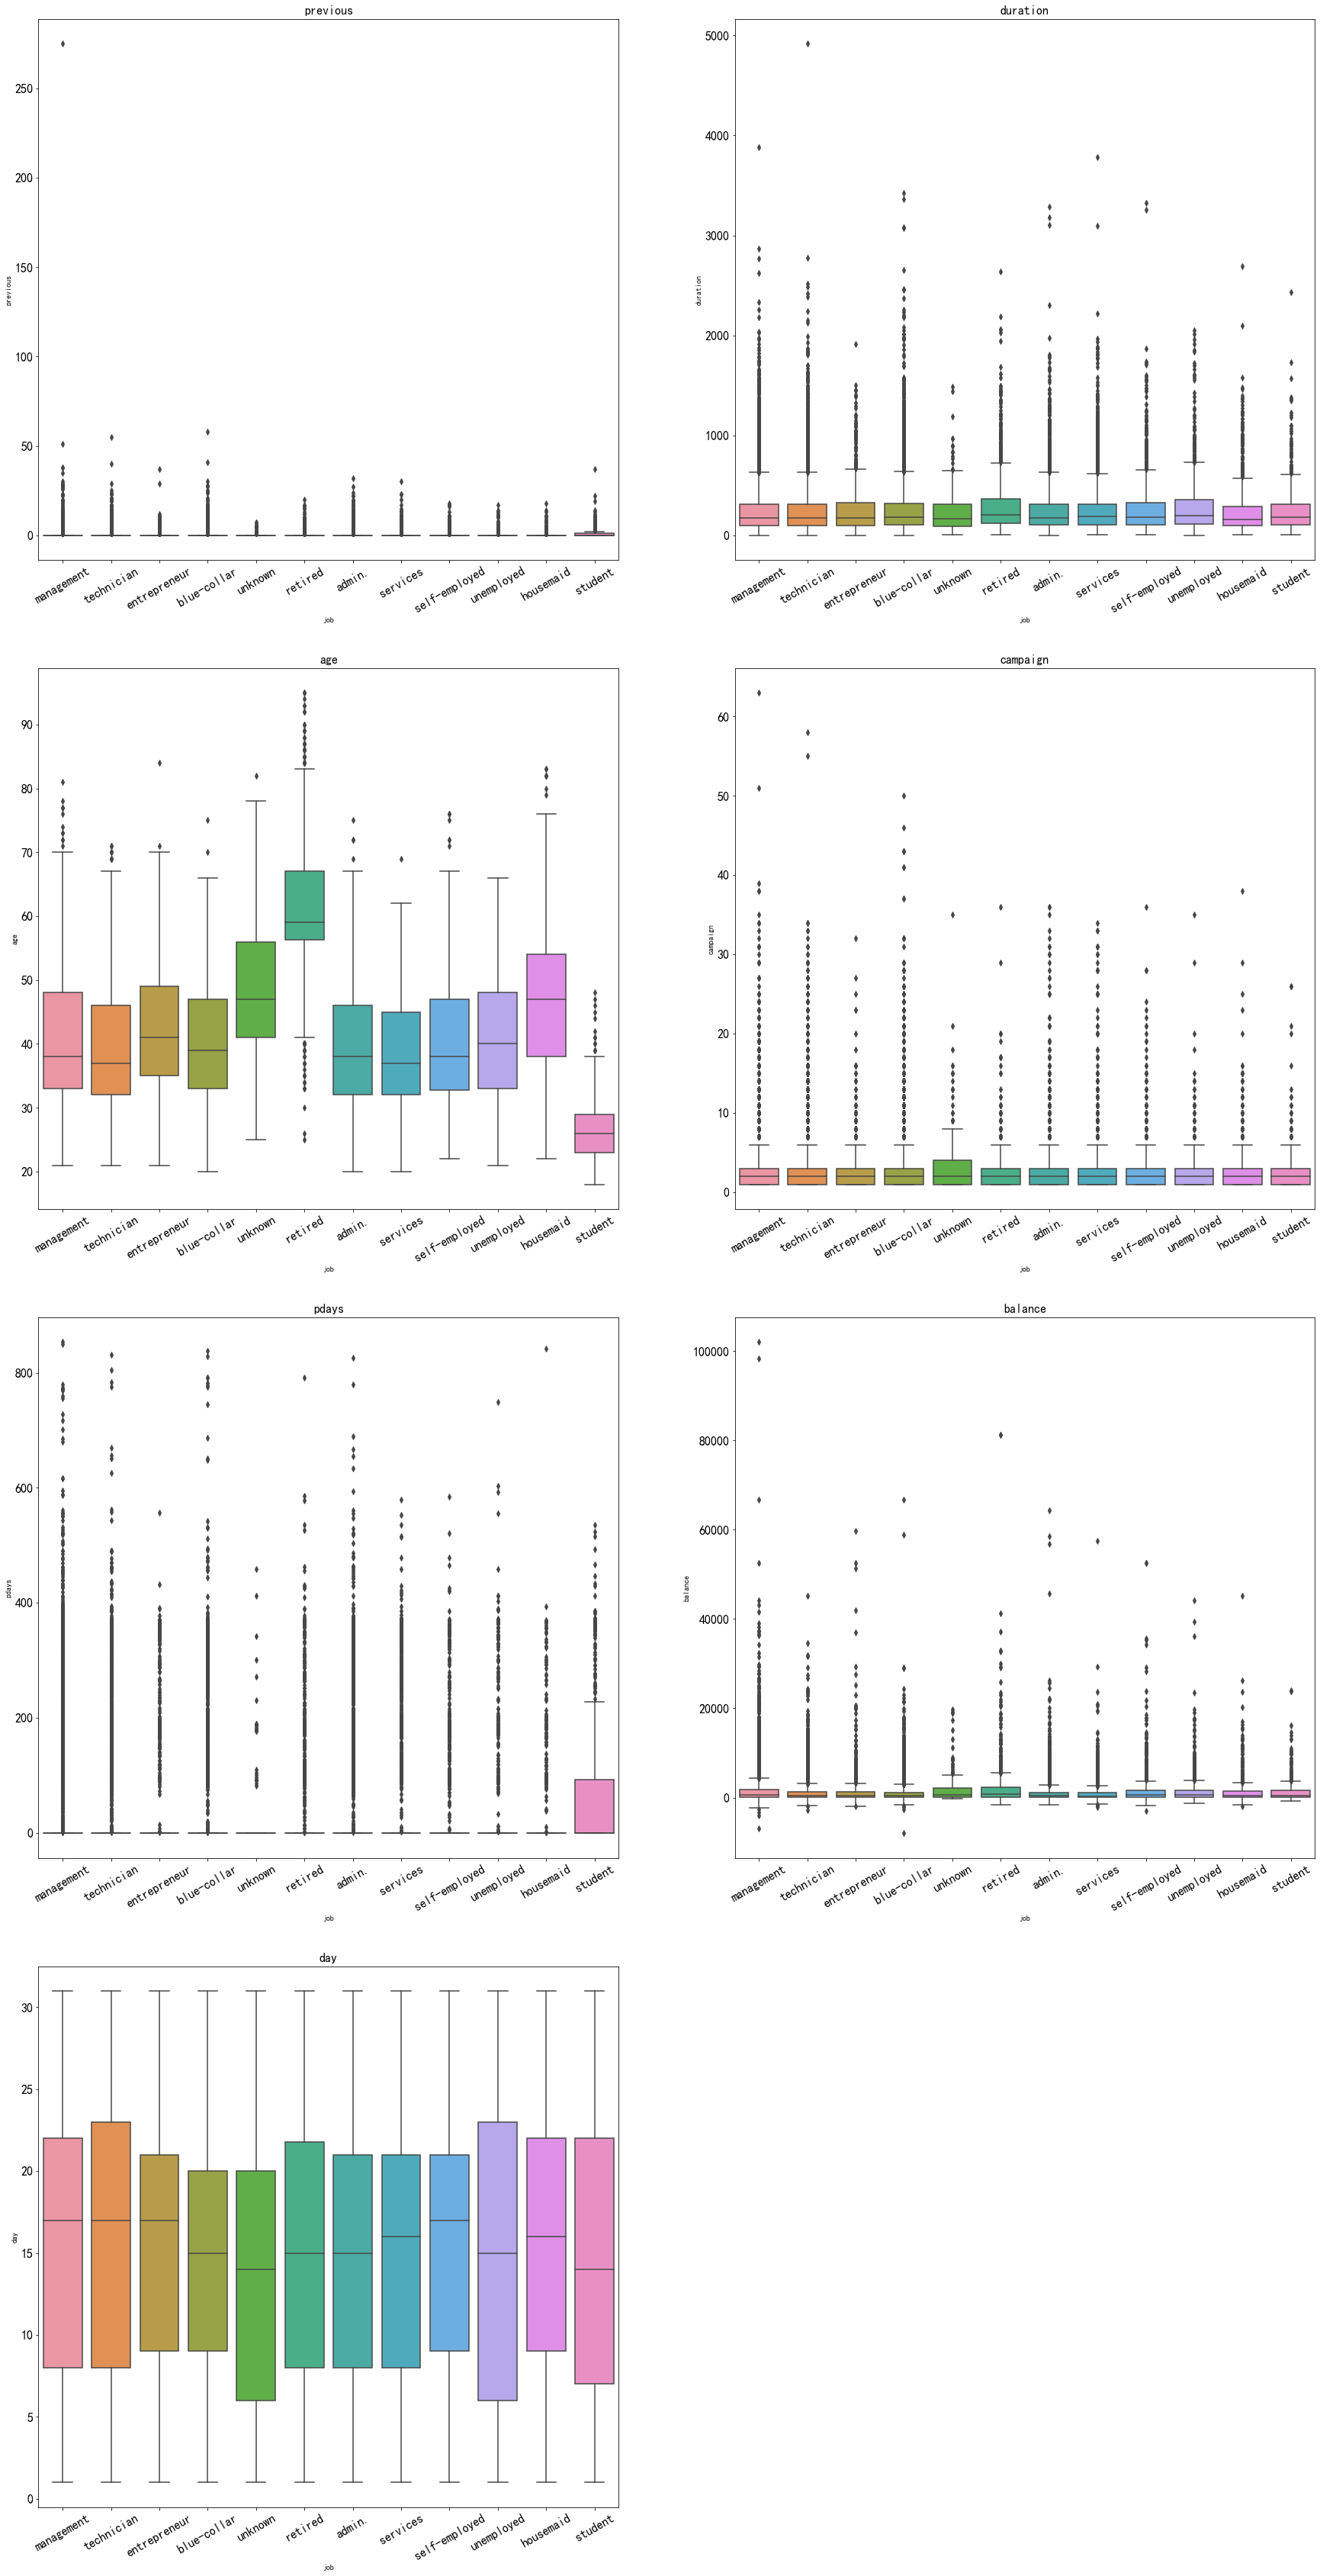

In [55]:
# job和其他数字型变量的关系

plt.figure(figsize = (30,60))
for i in range(1,num_plot_id):
    plt.subplot(nrows,2,i)
    sns.boxplot(x = "job", y = numeric_variables[i-1], data = df).set_title(numeric_variables[i-1], size = 16)
    plt.xticks(rotation = 30, size = 16)
    plt.yticks(size = 16)

这款产品的主要客户似乎针对学生，因为学生pdays更高一些，说明之前有联系过学生，而且学生的营销成功率更高

但是进一步查看数据后，发现学生占比的人数很少

In [56]:
df.groupby(["job","是否联系过"], as_index = False)["age"].agg({"num":"count"})

,job,是否联系过,num
0,admin.,0,3712
1,admin.,1,981
2,blue-collar,0,7321
3,blue-collar,1,1465
4,entrepreneur,0,1117
5,entrepreneur,1,202
6,housemaid,0,994
7,housemaid,1,134
8,management,0,6849
9,management,1,1640


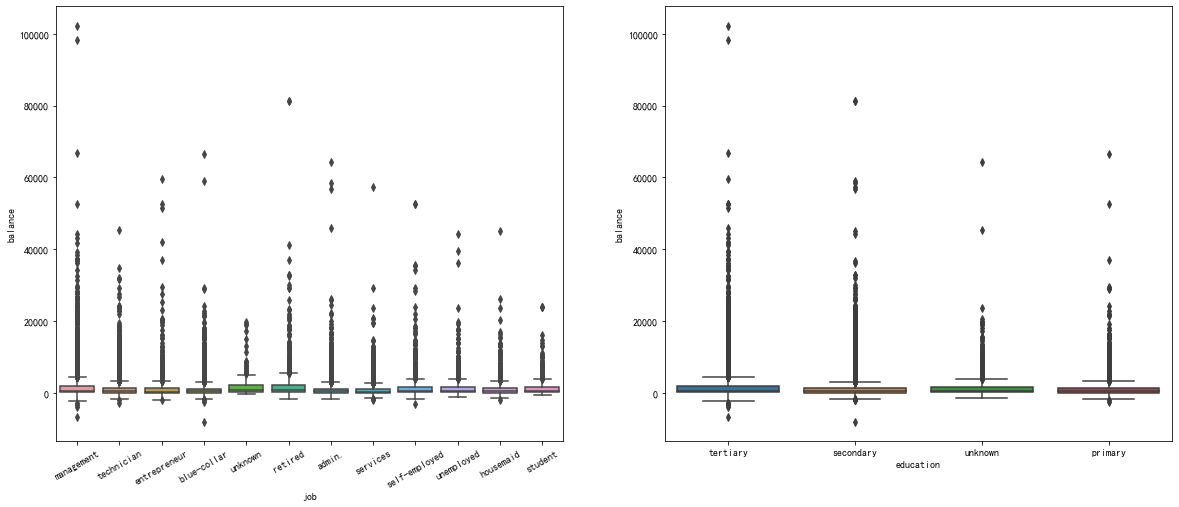

In [57]:
plt.figure(figsize = (20,8))
# 职业和balance
plt.subplot(121)
sns.boxplot(x = "job", y = "balance", data = df)
plt.xticks(rotation = 30)


# 教育和balance
plt.subplot(122)
sns.boxplot(x = "education", y = "balance", data = df )
plt.show()

In [58]:
# 比如，job和default是否有关
df.groupby(["job","default"], as_index = False)["age"].count()

,job,default,age
0,admin.,0,4625
1,admin.,1,68
2,blue-collar,0,8599
3,blue-collar,1,187
4,entrepreneur,0,1271
5,entrepreneur,1,48
6,housemaid,0,1108
7,housemaid,1,20
8,management,0,8339
9,management,1,150


In [59]:
# job和default之间的关系，百分比
temp = df.groupby(["job","default"])["age"].count()
temp_pct = temp.groupby(level=0).apply(lambda x:100 * x / int(x.sum()))
temp_pct

job            default
admin.         0          98.551033
               1           1.448967
blue-collar    0          97.871614
               1           2.128386
entrepreneur   0          96.360879
               1           3.639121
housemaid      0          98.226950
               1           1.773050
management     0          98.233007
               1           1.766993
retired        0          98.869223
               1           1.130777
self-employed  0          97.922636
               1           2.077364
services       0          98.180359
               1           1.819641
student        0          99.765808
               1           0.234192
technician     0          98.316005
               1           1.683995
unemployed     0          97.702128
               1           2.297872
unknown        0          99.200000
               1           0.800000
Name: age, dtype: float64

# 特征工程

In [60]:
# 归一化
def min_max_sca(data):
    '''
    data is an array
    '''
    return (data-data.min())/(data.max()-data.min())

In [61]:
# 标准化
def standardization(data):
    return (data-data.mean())/data.std()

## 构造时间

由于文章发布日期是2011年，设定营销活动在2011年

In [62]:
# 创建时间
df["ymd"] = pd.to_datetime("2011-"+df["month"] +"-" + df["day"].astype(str))

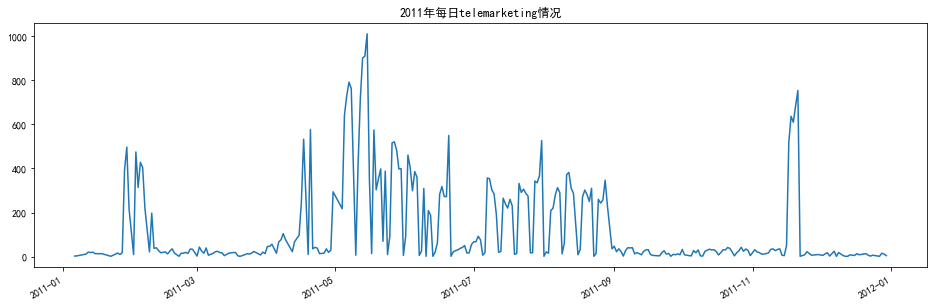

In [63]:
# 查看一整年的营销活动
plt.figure(figsize = (16,5))
df["ymd"].value_counts().plot()
plt.title("2011年每日telemarketing情况")
plt.show()

2月中、5-6月、7月中下旬-9月底、11月底-12月

In [64]:
# 提取星期
df["weekday"] = df["ymd"].dt.dayofweek+1

In [65]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,是否联系过,ymd,weekday
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0,0,2011-05-05,4
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0,0,2011-05-05,4
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0,0,2011-05-05,4
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0,0,2011-05-05,4
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0,0,2011-05-05,4


In [66]:
df["weekday"].value_counts()

6    8499
5    7983
7    7801
4    7341
1    4874
3    3676
2     516
Name: weekday, dtype: int64

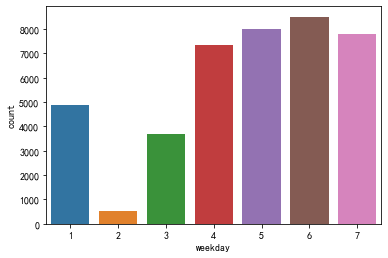

In [67]:
# 从weekday的分布上来看，3和2更可能是周日和周六
# 但是，因为weekday是一个categorical variable，所以具体的值也就不重要了
df["weekday"] = df["weekday"].astype(str)

# 画图
sns.countplot(df["weekday"])

In [68]:
# 修改测试集
test["ymd"] = pd.to_datetime("2011-"+test["month"] +"-" + test["day"].astype(str))
test["weekday"] = test["ymd"].dt.dayofweek+1
test["weekday"] = test["weekday"].astype(str)

In [69]:
# 删除数据
drop_columns =["day","ymd"]
df.drop(columns = drop_columns, inplace = True)
test.drop(columns = drop_columns, inplace = True)

## total_call: 一共打了多少电话

In [70]:
# total_call = previous + campaign
df["total_call"] = df["previous"] + df["campaign"]

In [71]:
# 将total_call取对数
df["ln_total_call"] = np.log(df["total_call"])

# 将total_call归一化
df["norm_total_call"] = min_max_sca(df["total_call"])

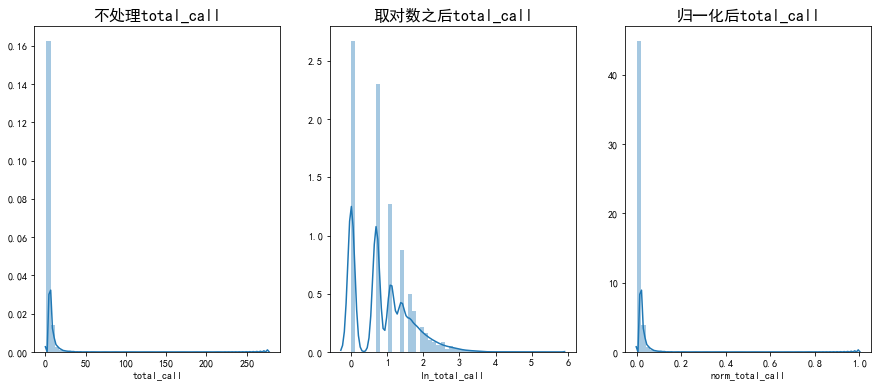

In [72]:
# 对比
plt.figure(figsize = (15,6))
plt.subplot(131)
sns.distplot(df['total_call'])
plt.title("不处理total_call",size = 16)


plt.subplot(132)
sns.distplot(df['ln_total_call'])
plt.title("取对数之后total_call", size = 16)

plt.subplot(133)
sns.distplot(df['norm_total_call'])
plt.title("归一化后total_call", size = 16)

plt.show()

In [73]:
# 保留norm_total_call
df.drop(columns = ["total_call","ln_total_call"], inplace = True)

In [74]:
# 在测试集上修改
test["total_call"] = test["previous"] + test["campaign"]
test["norm_total_call"] = min_max_sca(test["total_call"])

In [75]:
# 去掉test里的total_call
test.drop(columns = ["total_call"], inplace = True)

## 去掉previous，因为有了“是否联系过”作为dummy

In [76]:
# 去掉previous
df.drop(columns = ["previous"], inplace = True)
test.drop(columns = ["previous"], inplace = True)

## campaign, 归一化

In [77]:
# 归一化
df["st_campaign"] = min_max_sca(df["campaign"])

Text(0.5, 1.0, '归一化st_campaign')

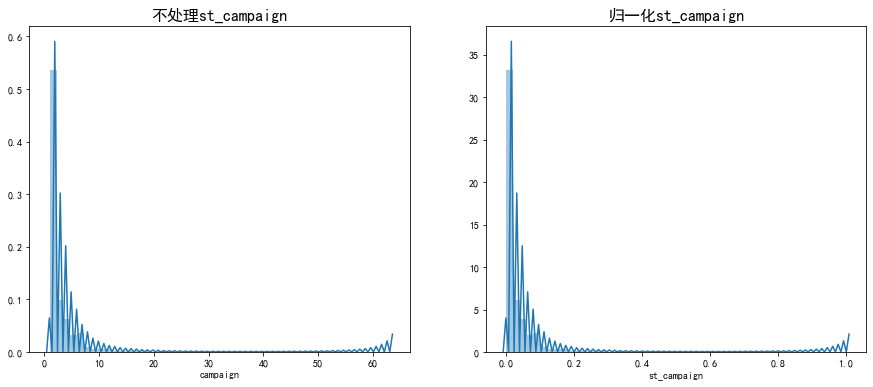

In [78]:
# 归一化前后对比
plt.figure(figsize = (15,6))
plt.subplot(121)
sns.distplot(df['campaign'])
plt.title("不处理st_campaign",size = 16)


plt.subplot(122)
sns.distplot(df['st_campaign'])
plt.title("归一化st_campaign", size = 16)

In [79]:
# 在测试集上修改
test["st_campaign"] = min_max_sca(test["campaign"])

In [80]:
# 删除campaign
df.drop(columns = ["campaign"], inplace = True)
test.drop(columns = ["campaign"], inplace = True)

## 把balance 标准化

In [81]:
# 标准化balance
df["st_balance"] = standardization(df["balance"])
test["st_balance"] = standardization(test["balance"])

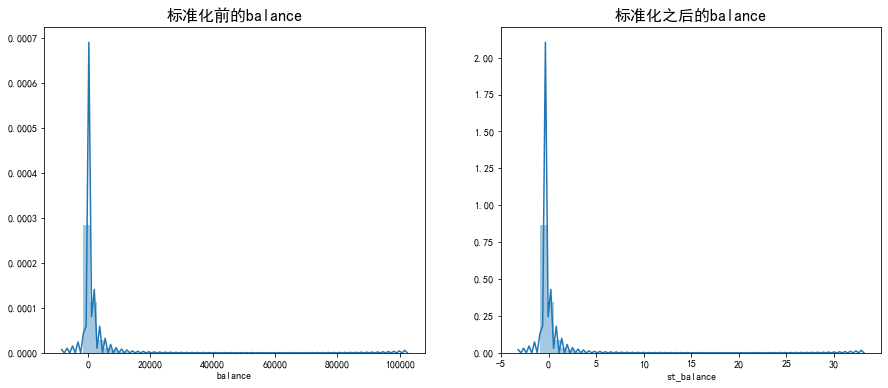

In [82]:
# 对比
plt.figure(figsize = (15,6))
plt.subplot(121)
sns.distplot(df['balance'])
plt.title("标准化前的balance",size = 16)


plt.subplot(122)
sns.distplot(df['st_balance'])
plt.title("标准化之后的balance", size = 16)

plt.show()

In [83]:
df.drop(columns = ["balance"], inplace = True)
test.drop(columns = ["balance"], inplace = True)

## duration 归一化

In [84]:
# 归一化
df["norm_duration"] = min_max_sca(df["duration"])

Text(0.5, 1.0, '归一化norm_duration')

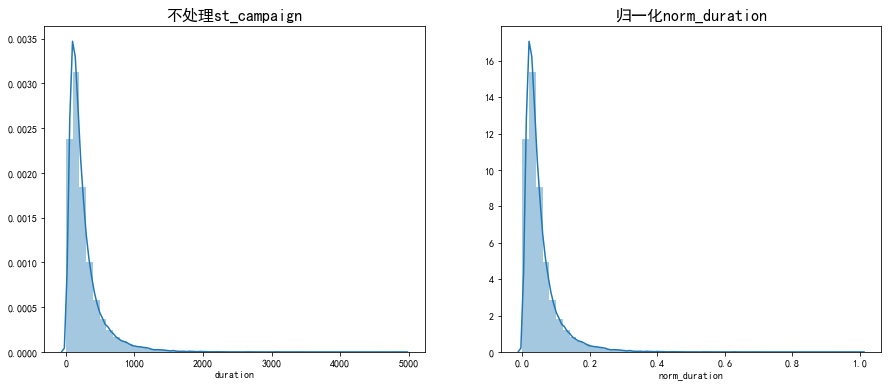

In [85]:
# 归一化前后对比
plt.figure(figsize = (15,6))
plt.subplot(121)
sns.distplot(df['duration'])
plt.title("不处理st_campaign",size = 16)


plt.subplot(122)
sns.distplot(df['norm_duration'])
plt.title("归一化norm_duration", size = 16)

In [86]:
# 在测试集上修改
test["norm_duration"] = min_max_sca(test["duration"])

In [87]:
# 去掉duration
df.drop(columns = ["duration"], inplace = True)
test.drop(columns = ["duration"], inplace = True)

## age做正态分布

In [88]:
df["ln_age"] = np.log(df["age"])

Text(0.5, 1.0, '正态分布age')

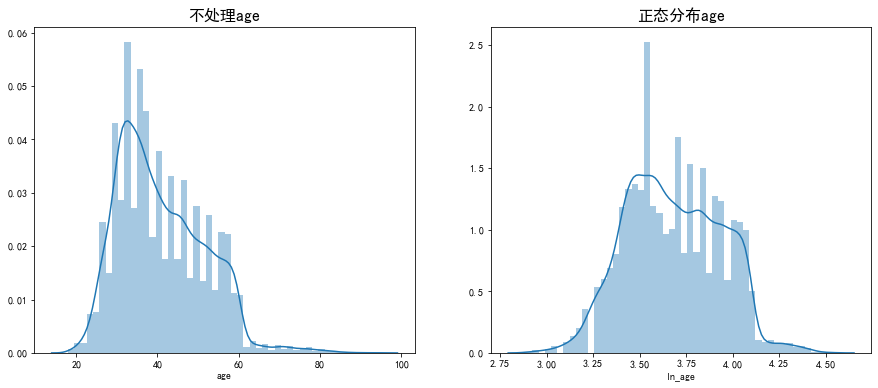

In [89]:
# 正态分布前后对比
plt.figure(figsize = (15,6))
plt.subplot(121)
sns.distplot(df['age'])
plt.title("不处理age",size = 16)


plt.subplot(122)
sns.distplot(df['ln_age'])
plt.title("正态分布age", size = 16)

In [90]:
# 在测试集上修改
test["ln_age"] = min_max_sca(test["age"])

In [91]:
# 去掉age
df.drop(columns = ["age"], inplace = True)
test.drop(columns = ["age"], inplace = True)

## pdays: 标准化

In [92]:
df["st_pdays"] = standardization(df["pdays"])
#df["st_pdays"] = np.log(df["pdays"]+2)

Text(0.5, 1.0, '标准化pdays')

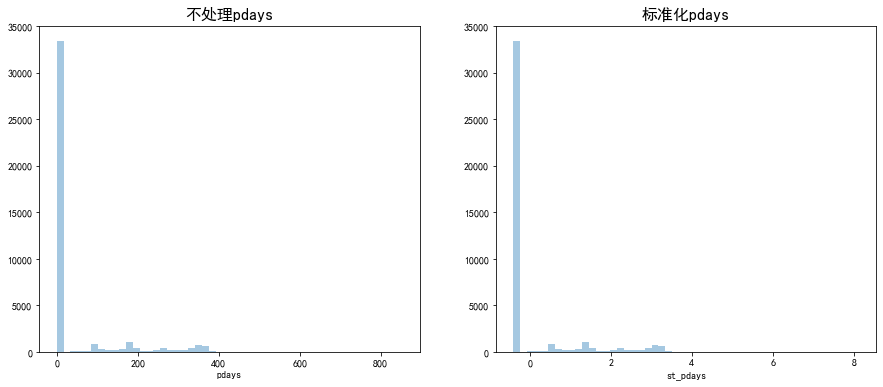

In [93]:
# 标准化前后对比
plt.figure(figsize = (15,6))
plt.subplot(121)
sns.distplot(df['pdays'],kde = False)
plt.title("不处理pdays",size = 16)


plt.subplot(122)
sns.distplot(df['st_pdays'], kde = False)
plt.title("标准化pdays", size = 16)

In [94]:
# 在测试集上修改
test["st_pdays"] = min_max_sca(test["pdays"])

In [95]:
# 去掉pdays
df.drop(columns = ["pdays"], inplace = True)
test.drop(columns = ["pdays"], inplace = True)

## 热力图

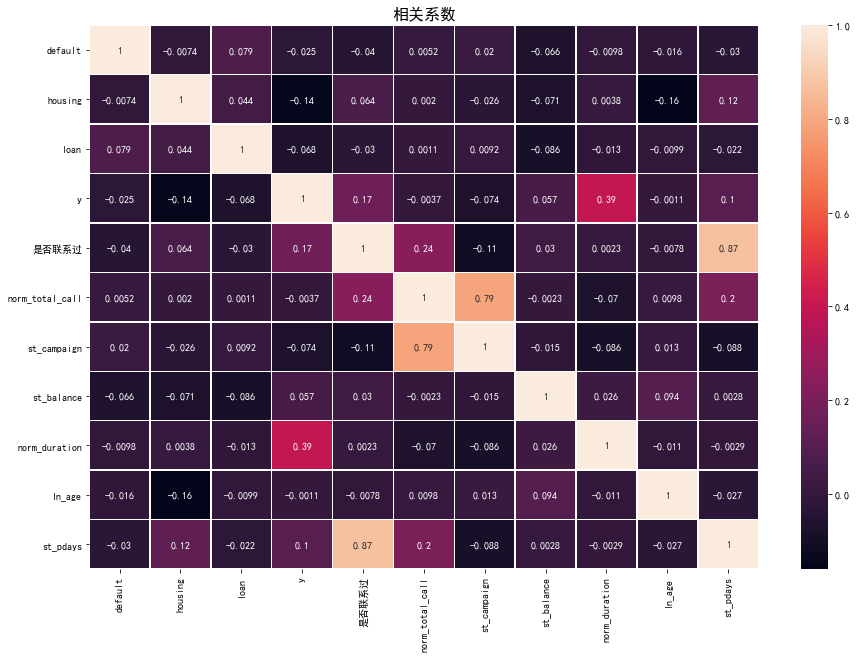

In [96]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True,linewidths=.5)
plt.title("相关系数",size = 16)
plt.show()

## One-Hot Encoding

In [97]:
df.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y', '是否联系过', 'weekday', 'norm_total_call',
       'st_campaign', 'st_balance', 'norm_duration', 'ln_age', 'st_pdays'],
      dtype='object')

In [98]:
df.dtypes

job                 object
marital             object
education           object
default              int64
housing              int64
loan                 int64
contact             object
month               object
poutcome            object
y                    int64
是否联系过                int64
weekday             object
norm_total_call    float64
st_campaign        float64
st_balance         float64
norm_duration      float64
ln_age             float64
st_pdays           float64
dtype: object

In [99]:
# One-Hot Encoding
mydf = pd.get_dummies(df)
mydf.head()

,default,housing,loan,y,是否联系过,norm_total_call,st_campaign,st_balance,norm_duration,ln_age,...,poutcome_other,poutcome_success,poutcome_unknown,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7
0,0,1,0,0,0,0.0,0.0,0.258294,0.053070,4.060443,...,0,0,1,0,0,0,1,0,0,0
1,0,1,0,0,0,0.0,0.0,-0.435137,0.030704,3.784190,...,0,0,1,0,0,0,1,0,0,0
2,0,1,1,0,0,0.0,0.0,-0.443994,0.015453,3.496508,...,0,0,1,0,0,0,1,0,0,0
3,0,1,0,0,0,0.0,0.0,0.049346,0.018707,3.850148,...,0,0,1,0,0,0,1,0,0,0
4,0,0,0,0,0,0.0,0.0,-0.444322,0.040260,3.496508,...,0,0,1,0,0,0,1,0,0,0


In [100]:
# 查看dummy变量
dum_variables = list(set(mydf.columns) - set(df.columns))

# 新dummy数量
print(len(dum_variables),"\n")

print(list(dum_variables))

45 

['job_unemployed', 'month_nov', 'month_may', 'marital_divorced', 'education_tertiary', 'weekday_2', 'month_mar', 'month_jun', 'marital_married', 'poutcome_success', 'education_secondary', 'weekday_7', 'job_technician', 'job_student', 'month_jul', 'month_jan', 'job_unknown', 'contact_unknown', 'education_unknown', 'poutcome_failure', 'contact_telephone', 'job_services', 'poutcome_other', 'month_dec', 'weekday_1', 'weekday_6', 'job_retired', 'job_housemaid', 'marital_single', 'weekday_5', 'weekday_3', 'job_blue-collar', 'job_self-employed', 'education_primary', 'month_feb', 'month_oct', 'job_management', 'job_admin.', 'weekday_4', 'month_apr', 'month_aug', 'month_sep', 'job_entrepreneur', 'poutcome_unknown', 'contact_cellular']


## 查看是否还需要降维

In [101]:
for var in dum_variables:
    print("%s\n"%var, mydf[var].value_counts())
    print("-"*30)

job_unemployed
 0    39515
1     1175
Name: job_unemployed, dtype: int64
------------------------------
month_nov
 0    37109
1     3581
Name: month_nov, dtype: int64
------------------------------
month_may
 0    28322
1    12368
Name: month_may, dtype: int64
------------------------------
marital_divorced
 0    36011
1     4679
Name: marital_divorced, dtype: int64
------------------------------
education_tertiary
 0    28739
1    11951
Name: education_tertiary, dtype: int64
------------------------------
weekday_2
 0    40174
1      516
Name: weekday_2, dtype: int64
------------------------------
month_mar
 0    40262
1      428
Name: month_mar, dtype: int64
------------------------------
month_jun
 0    35880
1     4810
Name: month_jun, dtype: int64
------------------------------
marital_married
 1    24417
0    16273
Name: marital_married, dtype: int64
------------------------------
poutcome_success
 0    39308
1     1382
Name: poutcome_success, dtype: int64
-----------------------

In [102]:
# 不需要降维, 在测试集上用
test_set = pd.get_dummies(test)
test_set.head()

,default,housing,loan,y,是否联系过,norm_total_call,st_campaign,st_balance,norm_duration,ln_age,...,poutcome_other,poutcome_success,poutcome_unknown,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7
0,0,0,0,0,0,0.000000,0.000000,0.121058,0.024826,0.161765,...,0,0,1,0,0,1,0,0,0,0
1,0,1,1,0,1,0.081633,0.000000,1.118521,0.071500,0.205882,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,1,0.020408,0.000000,-0.024142,0.059914,0.235294,...,0,0,0,0,0,0,0,0,1,0
3,0,1,1,0,0,0.061224,0.061224,0.017724,0.064548,0.161765,...,0,0,1,0,0,0,0,1,0,0
4,0,1,0,0,0,0.000000,0.000000,-0.472701,0.073486,0.588235,...,0,0,1,0,0,0,1,0,0,0


# 模型训练

In [103]:
# 准备训练集
var_x = list(set(mydf.columns) - set("y")) # 自变量
train_x, train_y = mydf[var_x],mydf["y"]

# 准备测试集
test_x, test_y = test_set[var_x],test_set["y"]

## KNN：分类

In [104]:
from sklearn.metrics import confusion_matrix

In [105]:
# 引入train_test_split是用来把数据集分为训练集和测试集
from sklearn.model_selection import train_test_split

# 使用KNeighborsClassifier 对算法进行训练

from sklearn.neighbors import KNeighborsClassifier

### 寻找最佳K

In [106]:
## 寻找最佳K值
from sklearn.model_selection import cross_val_score

In [107]:
def best_knn_search(k_range, y, x):
    k_error = []
    print("开始循环")
    
    # 循环取 看误差效果
    for k in k_range:
        
        knn = KNeighborsClassifier(n_neighbors=k)
        print("k=%d,CV中..." % k)
        
        #划分训练集和测试集
        scores = cross_val_score(knn, x, y, cv=3)
        print("现在是K=%d" % k, "模型得分:", scores)
        print("-"*30)
        k_error.append(1-scores.mean())


    plt.plot(k_range, k_error)
    plt.xlabel('k的值')
    plt.ylabel('错误')
    plt.show()
    
    return k_error

开始循环
k=10,CV中...
现在是K=10 模型得分: [0.88277794 0.64041879 0.50999042]
------------------------------
k=20,CV中...
现在是K=20 模型得分: [0.88329401 0.67647276 0.55326993]
------------------------------
k=30,CV中...
现在是K=30 模型得分: [0.88322029 0.7117157  0.57339822]
------------------------------
k=40,CV中...
现在是K=40 模型得分: [0.88314656 0.73656271 0.5937477 ]
------------------------------
k=50,CV中...
现在是K=50 模型得分: [0.88322029 0.76030377 0.60797759]
------------------------------


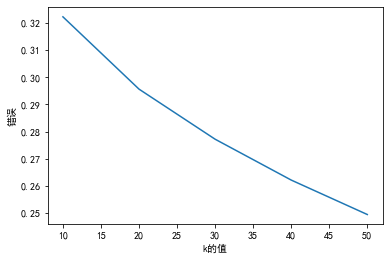

In [108]:
# 第一组
k_range_1 = [10,20,30,40,50]
k_error_1 = best_knn_search(k_range_1, y = train_y, x = train_x )

开始循环
k=50,CV中...
现在是K=50 模型得分: [0.88322029 0.76030377 0.60797759]
------------------------------
k=55,CV中...
现在是K=55 模型得分: [0.88322029 0.75875544 0.60930473]
------------------------------
k=60,CV中...
现在是K=60 模型得分: [0.88322029 0.77770405 0.62390327]
------------------------------
k=65,CV中...
现在是K=65 模型得分: [0.88322029 0.78087444 0.62589398]
------------------------------
k=70,CV中...
现在是K=70 模型得分: [0.88322029 0.79473568 0.63599499]
------------------------------
k=80,CV中...
现在是K=80 模型得分: [0.88322029 0.81161985 0.64565362]
------------------------------
k=100,CV中...
现在是K=100 模型得分: [0.88322029 0.83720416 0.66777262]
------------------------------


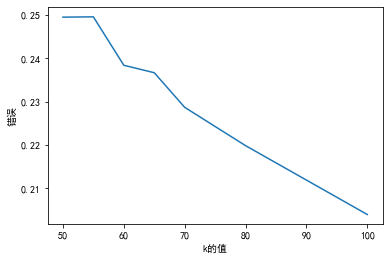

In [109]:
# 第二组
k_range_2 = [50, 55, 60, 65, 70, 80, 100]
k_error_2 = best_knn_search(k_range_2, y = train_y, x = train_x )

开始循环
k=50,CV中...
现在是K=50 模型得分: [0.88322029 0.76030377 0.60797759]
------------------------------
k=75,CV中...
现在是K=75 模型得分: [0.88322029 0.79761115 0.63717467]
------------------------------
k=100,CV中...
现在是K=100 模型得分: [0.88322029 0.83720416 0.66777262]
------------------------------
k=125,CV中...
现在是K=125 模型得分: [0.88307284 0.85357222 0.68731107]
------------------------------
k=150,CV中...
现在是K=150 模型得分: [0.88299912 0.86197744 0.70515373]
------------------------------


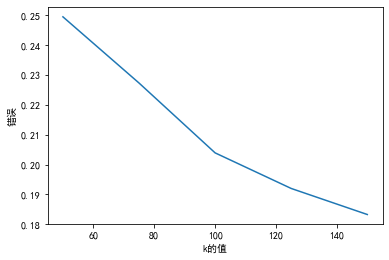

In [110]:
# 第三组
k_range_3 = [50, 75 , 100, 125, 150]
k_error_3 = best_knn_search(k_range_3, y = train_y, x = train_x )

开始循环
k=200,CV中...
现在是K=200 模型得分: [0.88307284 0.8753963  0.72196417]
------------------------------
k=400,CV中...
现在是K=400 模型得分: [0.88292539 0.8835066  0.7817592 ]
------------------------------
k=600,CV中...
现在是K=600 模型得分: [0.88285167 0.88284303 0.88004129]
------------------------------
k=800,CV中...
现在是K=800 模型得分: [0.88277794 0.8827693  0.88328541]
------------------------------
k=1000,CV中...
现在是K=1000 模型得分: [0.88277794 0.88284303 0.88313795]
------------------------------


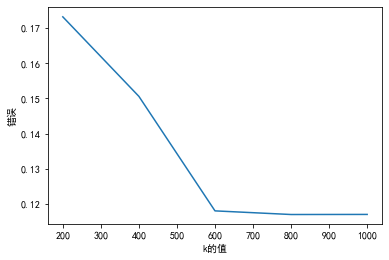

In [111]:
# 第4组
k_range_4 = [200,400,600,800,1000]
k_error_4 = best_knn_search(k_range_4, y = train_y, x = train_x )

开始循环
k=1500,CV中...
现在是K=1500 模型得分: [0.88277794 0.88284303 0.88284303]
------------------------------
k=2000,CV中...
现在是K=2000 模型得分: [0.88277794 0.88284303 0.88284303]
------------------------------
k=2500,CV中...
现在是K=2500 模型得分: [0.88277794 0.88284303 0.88284303]
------------------------------
k=3000,CV中...
现在是K=3000 模型得分: [0.88277794 0.88284303 0.88284303]
------------------------------
k=4000,CV中...
现在是K=4000 模型得分: [0.88277794 0.88284303 0.88284303]
------------------------------


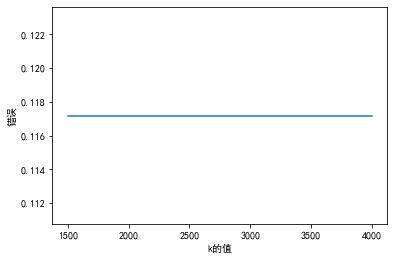

In [112]:
# 第5组
k_range_5 = [1500,2000,2500,3000,4000]
k_error_5 = best_knn_search(k_range_5, y = train_y, x = train_x )

### 不同K对于训练集上模型评分影响

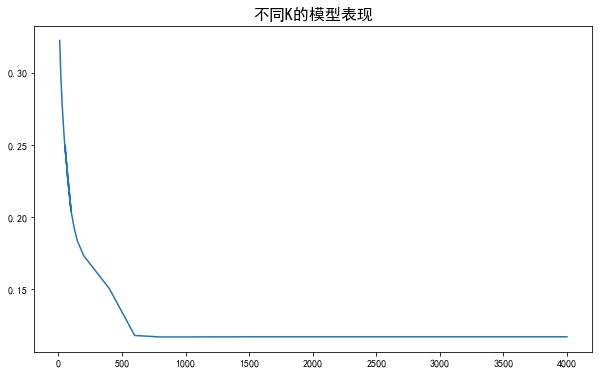

In [118]:
# k范围和error
k_range = k_range_1 + k_range_2 + k_range_3 + k_range_4 + k_range_5
k_error = k_error_1+k_error_2+k_error_3+k_error_4+k_error_5

#　画图
plt.figure(figsize = (10,6))
plt.plot(k_range, k_error)
plt.title("不同K的模型表现", size = 16)
plt.show()

### 预测：取不同K值

In [ ]:
# 从上面几组数据中，抽取改组数据中最好结果
k_test = [50, 100, 150, 600, 1000, 2000, 4000]
matrix_test = []
test_score = []

for k in k_test:
    
    print("正在预测K=%d ...." %k)
    # KNN预测
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x,train_y)
    y_predict = knn.predict(test_x)
    
    # confusion matrix
    matrix_test.append(confusion_matrix(test_y, y_predict))
    
    # test_score
    test_score.append(knn.score(test_x,test_y))
    
print("完成！")

正在预测K=50 ....
正在预测K=100 ....
正在预测K=150 ....


In [240]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(train_x,train_y)
y_predict = knn.predict(test_x)

In [ ]:
plt.figure(figsize = (8,5))
plt.plot(k_test, test_score)
plt.title("Test Score in Test Set", size = 16)
plt.show()

In [ ]:
plt.figure(figsize = (15, 8))
'''

By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
is equal to the number of observations known to be in group :math:`i` and
predicted to be in group :math:`j`.

:math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
:math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

'''
for i in range(1,len(k_test)+1):
    plt.subplot(2,3,i)
    sns.heatmap(matrix_test[i-1],annot=True,fmt='.5g',linewidth = 0.5,
               yticklabels = ["False","True"], xticklabels = ["Pred_False","Pred_True"])
    plt.title("K=%d" %k_test[i-1])

### 总结1：



**1. 数据微微微微有倾斜**

还是老生常谈的那个问题：y的0和1比差距有些大

虽然，在测试集中，模型的分数很高，但是这是由于众多true_negative的情况下拉出来的

**2.K的值不应该过大**

在前面的测试中，当K的值>500时，没有true positive；

**而且，随着K变得更大，训练集中的误差也先下降，后上升，最后保持不动**

**在训练集中，随着K增加，模型逐渐过拟合，导致TEST SCORE下降**

当K逐步缩小，(1,1)逐步上升，但是（0,1）的数量也增加了

作为更应该判断哪些人是潜在target consumer，应该关注(1,1)的结果

**3. Matrix里每个意思**

* 左下：false negative，流失用户
* 右下：true positive，正确，重点关注
* 左上：true negative，可以考虑发展用户
* 右上：false positive，可以去吸引用户，但是不能过度引起反感

### 重采样：重复取y=1的结果，使得training set中yes:no接近1:1

In [229]:
# 在样本里添加一份y=1的数据
duplicates_mydf = mydf.append(mydf[mydf.y == 1])
duplicates_mydf.shape

(45458, 56)

In [230]:
# 分类结果
duplicates_mydf["y"].value_counts()

0    35922
1     9536
Name: y, dtype: int64

In [233]:
# 数据分类
x_train_dup = duplicates_mydf[var_x]
y_train_dup = duplicates_mydf["y"]

# 查看数据大小
print(x_train_dup.shape)

(45458, 55)


开始循环
k=200,CV中...
现在是K=200 模型得分: [0.75054445 0.67392596 0.58903115]
------------------------------
开始循环
k=400,CV中...
现在是K=400 模型得分: [0.79911569 0.73035043 0.60995248]
------------------------------
开始循环
k=600,CV中...
现在是K=600 模型得分: [0.79786181 0.76473306 0.62090813]
------------------------------
开始循环
k=1000,CV中...
现在是K=1000 模型得分: [0.79614598 0.81132449 0.61701426]
------------------------------
开始循环
k=1500,CV中...
现在是K=1500 模型得分: [0.79337425 0.80960866 0.61813622]
------------------------------
开始循环
k=2000,CV中...
现在是K=2000 模型得分: [0.79172441 0.80063354 0.62071014]
------------------------------


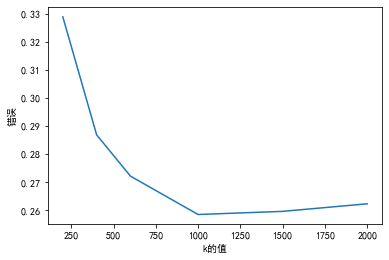

In [234]:
#寻找最佳K
'''
第四组：
目前跑出来1000最好,耗时12m33s

'''
k_range_dup = [200, 400, 600, 1000, 1500, 2000]
k_error_dup = []
x = x_train_dup
y = y_train_dup


# 循环取 看误差效果
for k in k_range_dup:
    print("开始循环")
    knn = KNeighborsClassifier(n_neighbors=k)
    print("k=%d,CV中..." % k)
    # cv参数也是划分训练集和测试集
    scores = cross_val_score(knn, x, y, cv=3)
    print("现在是K=%d" % k, "模型得分:", scores)
    print("-"*30)
    k_error_dup.append(1-scores.mean())
    
    
plt.plot(k_range_dup, k_error_dup)
plt.xlabel('k的值')
plt.ylabel('错误')
plt.show()